# World malnutrition accross the globe

data taken from kaggle: https://www.kaggle.com/ruchi798/malnutrition-across-the-globe

In [1]:
import pandas as pd 
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [3]:
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [4]:
#individual estimates for countries for each year in dataframe
mal = pd.read_csv("malnutrition-estimates.csv", index_col=[0])
#Country-wise estimates for all years
avg_mal = pd.read_csv("country-wise-average.csv", index_col=[0])

In [5]:
mal.head()

,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225


In [6]:
avg_mal.head()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
Country,,,,,,,
AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


## Questions
- Was there a decline or rise in the number of malnutrition cases country-wise?
- Which countries bear the greatest share of all forms of malnutrition?
- % of stunted, overweight and wasted children under 5, by country income classification

In [7]:
#What countries have the most wasting on average?
avg_mal.sort_values("Wasting", ascending=False)["Wasting"].head()

Country
SOUTH SUDAN    23.650000
INDIA          18.766667
DJIBOUTI       17.075000
MAURITIUS      17.000000
NIGER (THE)    15.936364
Name: Wasting, dtype: float64

In [8]:
#What countries are most stunting on average?
avg_mal.sort_values("Stunting", ascending=False)["Stunting"].head()

Country
BURUNDI        57.600000
TIMOR-LESTE    55.380000
BANGLADESH     54.229167
GUATEMALA      54.100000
ERITREA        53.225000
Name: Stunting, dtype: float64

In [9]:
#What are the countries with the most underweight?
avg_mal.sort_values("Underweight", ascending=False)["Underweight"].head()

Country
BANGLADESH     46.266667
INDIA          42.977778
TIMOR-LESTE    42.800000
NIGER (THE)    38.263636
YEMEN          37.785714
Name: Underweight, dtype: float64

In [10]:
#What are the countries with the most overweight?
avg_mal.sort_values("Overweight", ascending=False)["Overweight"].head()

Country
UKRAINE                   26.500000
LIBYA                     21.800000
ALBANIA                   20.800000
BOSNIA AND HERZEGOVINA    19.800000
GEORGIA                   19.533333
Name: Overweight, dtype: float64

In [11]:
#Are there correlations between each category?
avg_mal.corr()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
Income Classification,1.000000,-0.462363,-0.510417,0.295214,-0.761266,-0.658230,-0.038979
Severe Wasting,-0.462363,1.000000,0.895511,-0.035531,0.486065,0.647534,0.149094
Wasting,-0.510417,0.895511,1.000000,-0.282840,0.580983,0.823864,0.184051
Overweight,0.295214,-0.035531,-0.282840,1.000000,-0.364568,-0.525527,-0.113036
Stunting,-0.761266,0.486065,0.580983,-0.364568,1.000000,0.864643,0.154244
Underweight,-0.658230,0.647534,0.823864,-0.525527,0.864643,1.000000,0.234327
U5 Population ('000s),-0.038979,0.149094,0.184051,-0.113036,0.154244,0.234327,1.000000


<AxesSubplot:>

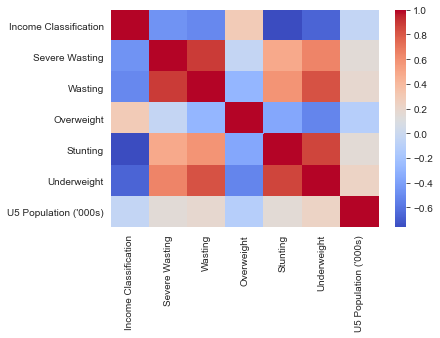

In [12]:
sns.heatmap(avg_mal.corr(), cmap="coolwarm")

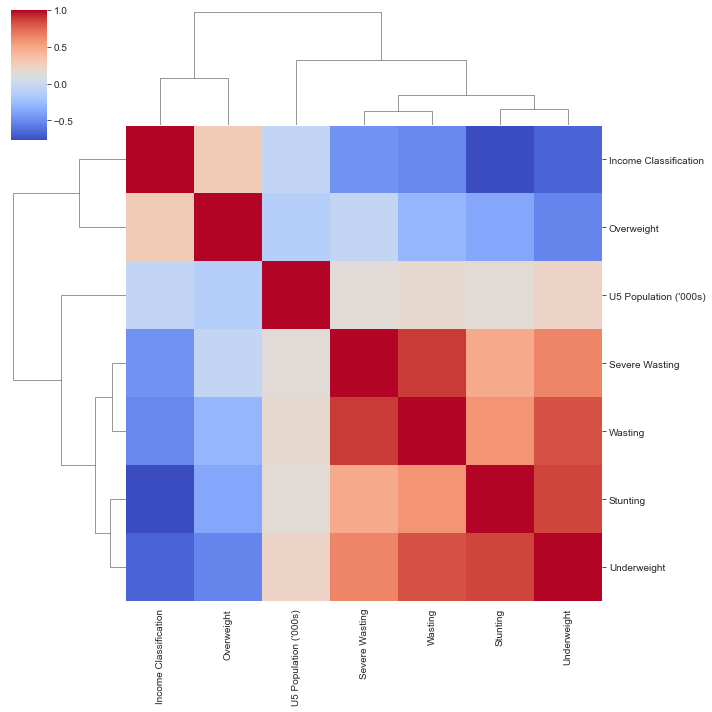

In [13]:
sns.clustermap(avg_mal.corr(), cmap="coolwarm")

high correlations:
- stunting and underweight
- underweight and waisting
- stunting and wasting

low correlation:
- income class and underweight
- income class and stunting
- income class and wasting

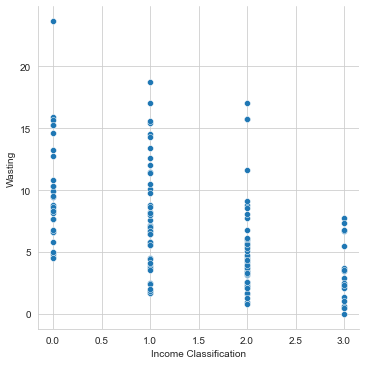

In [16]:
sns.relplot(y="Wasting", x="Income Classification", data=avg_mal)